<a href="https://colab.research.google.com/github/tantai17132002/DH/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<center>Chương trình Python để mô phỏng trò chơi cá cược</center>**

In [6]:
import random

def game(p, N, W0):
    tai_san = W0
    while tai_san > 0 and tai_san < N:
        if random.random() < p:
            tai_san += 1
        else:
            tai_san -= 1
    return tai_san

##1. Tính xác suất ra về tay trắng tương ứng với p = 0.25, 0.5, 0.75

In [7]:
def tinh_xac_suat_ket_thuc(p, N, W0, sl_mo_phong):
    tay_trang = 0
    for _ in range(sl_mo_phong):
        ket_thuc_phan_thuong = game(p, N, W0)
        if ket_thuc_phan_thuong == 0:
            tay_trang += 1
    return tay_trang / sl_mo_phong

p = [0.25, 0.5, 0.75]
N = 1000  # 1000$ Số tài sản mà nếu đạt được, trò chơi kết thúc
W0 = 20  # Số tiền ban đầu
sl_mo_phong = 500  # Số lần mô phỏng
for p in p:
    xac_suat_tay_trang = tinh_xac_suat_ket_thuc(p, N, W0, sl_mo_phong)
    print(f"Xác suất ra về tay trắng với p={p}: {xac_suat_tay_trang:.4f}")

Xác suất ra về tay trắng với p=0.25: 1.0000
Xác suất ra về tay trắng với p=0.5: 0.9760
Xác suất ra về tay trắng với p=0.75: 0.0000


##2. Tính xác suất thắng được N = $100, với p = 0.25, 0.5, 0.75

In [10]:
def tinh_xac_suat_ket_thuc_win(p, N, W0, sl_mo_phong):
    thang = 0
    for _ in range(sl_mo_phong):
        ket_thuc = game(p, N, W0)
        if ket_thuc == N:
            thang += 1
    return thang / sl_mo_phong

p = [0.25, 0.5, 0.75]
N = 100
W0 = 20
sl_mo_phong = 500
for p in p:
    xac_suat_thang = tinh_xac_suat_ket_thuc_win(p, N, W0, sl_mo_phong)
    print(f"Xác suất thắng với p={p}: {xac_suat_thang:.4f}")

Xác suất thắng với p=0.25: 0.0000
Xác suất thắng với p=0.5: 0.1820
Xác suất thắng với p=0.75: 1.0000


##3. Nhận xét sự tương quan giữa tài sản khởi đầu và xác suất ra về tay trắng tương ứng với p = 0.25, 0.5, 0.75

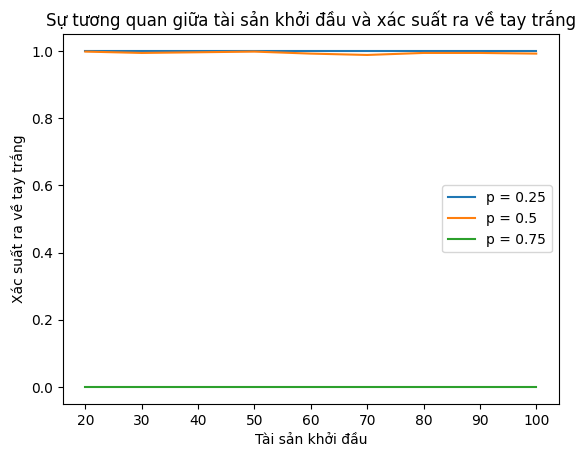

In [13]:
import matplotlib.pyplot as plt

# Hàm tính xác suất ra về tay trắng
def tinh_xac_suat_tay_trang(p, N, W0_values, sl_mo_phong):
    xac_suat = []
    for W0 in W0_values:
        prob = tinh_xac_suat_ket_thuc(p, N, W0, sl_mo_phong)
        xac_suat.append(prob)
    return xac_suat

# Các giá trị tài sản khởi đầu
W0_values = list(range(20, 101, 10))

# Số lượt mô phỏng
sl_mo_phong = 500

# Các giá trị xác suất
p_values = [0.25, 0.5, 0.75]

# Tính toán xác suất tương ứng với mỗi giá trị tài sản khởi đầu
xac_suat = {}
for p in p_values:
    xac_suat[p] = tinh_xac_suat_tay_trang(p, N, W0_values, sl_mo_phong)

# Trực quan hóa sự tương quan giữa tài sản khởi đầu và xác suất ra về tay trắng
for p in p_values:
    plt.plot(W0_values, xac_suat[p], label=f'p = {p}')

plt.xlabel('Tài sản khởi đầu')
plt.ylabel('Xác suất ra về tay trắng')
plt.title('Sự tương quan giữa tài sản khởi đầu và xác suất ra về tay trắng')
plt.legend()
plt.show()


##4. Viết chương trình chính xác ra về tay trắng với W0 = $100 và xác suất p nằm trong khoảng từ 0.1 đến 0.9

In [11]:
import numpy as np

N = 10000
W0 = 100
sl_mo_phong = 500

def tinh_xac_suat(p):
    tay_trang = 0
    for _ in range(sl_mo_phong):
        ket_thuc_phan_thuong = game(p, N, W0)
        if ket_thuc_phan_thuong == 0:
            tay_trang += 1
    return tay_trang / sl_mo_phong

p_ = np.linspace(0.1, 0.9, 9)

for p in p_:
    xac_suat_thang = tinh_xac_suat_ket_thuc(p, N, W0, sl_mo_phong)
    print(f"Xác suất thắng với p={p:.2f}: {xac_suat_thang:.4f}")

Xác suất thắng với p=0.10: 1.0000
Xác suất thắng với p=0.20: 1.0000
Xác suất thắng với p=0.30: 1.0000
Xác suất thắng với p=0.40: 1.0000
Xác suất thắng với p=0.50: 0.9960
Xác suất thắng với p=0.60: 0.0000
Xác suất thắng với p=0.70: 0.0000
Xác suất thắng với p=0.80: 0.0000
Xác suất thắng với p=0.90: 0.0000
